In [39]:
pip install --upgrade pandas prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 10.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [38]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import openpyxl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from scipy import sparse

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="prophet.plot")

In [4]:
# Ruta de los datos
df1 = pd.read_excel('/Users/fernandopradagorge/Documents/Documentos - MacBook Pro de Fernando/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Evolución ventas vehículos particulares/Lista detallada de ventas.xlsx')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   V                      7906 non-null   object        
 1   Fecha                  7904 non-null   datetime64[ns]
 2   V/A                    7904 non-null   object        
 3   IDV                    7904 non-null   float64       
 4   Origen                 7904 non-null   object        
 5   Referencia             7904 non-null   float64       
 6   Tipo Vehículo          7686 non-null   object        
 7   Matricula              7814 non-null   object        
 8   Marca                  7904 non-null   object        
 9   Modelo                 7904 non-null   object        
 10  Canal                  7904 non-null   object        
 11  Facturación            7905 non-null   float64       
 12  Facturación (media)    7905 non-null   float64       
 13  Imp

In [6]:
df1.head()

,V,Fecha,V/A,IDV,Origen,Referencia,Tipo Vehículo,Matricula,Marca,Modelo,...,Cambio,Kilómetros,Fecha Matric.,Segmento,SubSegmento,Importe Remarketing,Margen I,Margen II,Margen III,Margen IV
0,1,2024-01-18,V,156385.0,VO,31114932.0,MOTOS,6457GSW,PIAGGIO,PIAGGIO VESPA 50CC,...,AUTOMATICO,72940.0,2010-01-18,NaN,NaN,0.00,82.65,82.65,-48.56,-48.56
1,1,2023-03-21,V,156385.0,VO,28637837.0,MOTOS,6457GSW,PIAGGIO,PIAGGIO VESPA 50CC,...,AUTOMATICO,72940.0,2010-01-18,NaN,NaN,0.00,413.22,413.22,476.84,476.84
2,1,2023-06-29,V,159474.0,VO,29507497.0,TURISMOS,5383GTM,FORD,FOCUS,...,MANUAL,124380.0,2010-02-22,Turismos,Segmento C,0.00,991.73,991.73,855.35,855.35
3,1,2024-03-18,V,200955.0,VO,31567110.0,TURISMOS,4134HSR,OPEL,OPEL CORSA,...,MANUAL,106772.0,2013-08-29,Turismos,Segmento B,1347.61,4123.97,4123.97,2861.92,2861.92
4,1,2023-01-16,V,205707.0,VO,28058110.0,TURISMOS,1962HTZ,ALFA,GIULIETTA,...,MANUAL,66511.0,2013-12-18,Turismos,Segmento C,0.00,2300.51,2300.51,1618.87,1618.87


### EDA

In [7]:
df1.columns

Index(['V', 'Fecha', 'V/A', 'IDV', 'Origen', 'Referencia', 'Tipo Vehículo',
       'Matricula', 'Marca', 'Modelo', 'Canal', 'Facturación',
       'Facturación (media)', 'Importe Venta (media)', 'Margen', 'Financiado',
       'Imp. Financiado', 'Interés', 'Financiera', 'NumeroCuotas',
       'Concesionario', 'Vendedor', 'Comprador', 'Días en Stock', 'Bastidor',
       'Combustible', 'Cambio', 'Kilómetros', 'Fecha Matric.', 'Segmento',
       'SubSegmento', 'Importe Remarketing', 'Margen I', 'Margen II',
       'Margen III', 'Margen IV'],
      dtype='object')

In [8]:
df1 = df1.drop(['Referencia', 'Canal', 'Matricula', 'Financiado', 'Imp. Financiado', 'Interés', 'Financiera', 'NumeroCuotas', 'Vendedor', 'Comprador', 'Bastidor', 'Kilómetros', 'V', 'V/A', 'IDV', 'Margen I', 'Margen II', 'Margen III', 'Margen IV', 'Segmento', 'SubSegmento', 'Fecha Matric.', 'Cambio', 'Días en Stock', 'Importe Remarketing', 'Margen'], axis = 1)

In [9]:
df1.columns

Index(['Fecha', 'Origen', 'Tipo Vehículo', 'Marca', 'Modelo', 'Facturación',
       'Facturación (media)', 'Importe Venta (media)', 'Concesionario',
       'Combustible'],
      dtype='object')

In [10]:
df2 = df1.copy()

In [11]:
df2.columns

Index(['Fecha', 'Origen', 'Tipo Vehículo', 'Marca', 'Modelo', 'Facturación',
       'Facturación (media)', 'Importe Venta (media)', 'Concesionario',
       'Combustible'],
      dtype='object')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha                  7904 non-null   datetime64[ns]
 1   Origen                 7904 non-null   object        
 2   Tipo Vehículo          7686 non-null   object        
 3   Marca                  7904 non-null   object        
 4   Modelo                 7904 non-null   object        
 5   Facturación            7905 non-null   float64       
 6   Facturación (media)    7905 non-null   float64       
 7   Importe Venta (media)  7905 non-null   float64       
 8   Concesionario          7904 non-null   object        
 9   Combustible            7224 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 617.9+ KB


In [13]:
df2 = df2.drop(['Concesionario', 'Tipo Vehículo'], axis = 1)

In [14]:
df2.isnull().sum()

Fecha                      3
Origen                     3
Marca                      3
Modelo                     3
Facturación                2
Facturación (media)        2
Importe Venta (media)      2
Combustible              683
dtype: int64

In [15]:
# Eliminar los 3 nulos de la columna 'Fecha' ya que no son significativos para el modelo
df2.dropna(subset = ['Fecha'], inplace = True)

In [16]:
# Establecer la columan 'Fecha' como índice 
df2.set_index('Fecha', inplace = True)

### Imputación de valores nulos

In [17]:
# Definir las transformaciones para las columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', MinMaxScaler())
])

In [18]:
# Definir las transfformaciones para las columnas categórica
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown ='ignore'))
])

In [19]:
# Crear el transformador de columnas usando el ColumnTransform
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, df2.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', categorical_transformer, df2.select_dtypes(include=['object']).columns)
])

In [20]:
# Crear la pipeline
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor)
])

In [21]:
# Aplicar el pipeline al DataFrame
df2_transformed = pipeline.fit_transform(df2)

In [22]:
print("Forma del DataFrame transformado:", df2_transformed.shape)

Forma del DataFrame transformado: (7904, 431)


In [23]:
category_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out()
new_columns = list(df2.select_dtypes(include=['float64', 'int64']).columns) + list(category_columns)

In [24]:
print("Verificación final antes de crear el DataFrame:")
print("Forma del df2_transformed:", df2_transformed.shape)
print("Dimensiones esperadas de new_columns:", len(new_columns))

Verificación final antes de crear el DataFrame:
Forma del df2_transformed: (7904, 431)
Dimensiones esperadas de new_columns: 431


In [25]:
# Convertir la matriz dispersa a una matriz densa si es necesario
if sparse.issparse(df2_transformed):
    print("Converting sparse matrix to dense matrix...")
    df2_transformed = df2_transformed.toarray()

if df2_transformed.shape[1] == len(new_columns):
    df2_final = pd.DataFrame(df2_transformed, index=df2.index, columns=new_columns)
    print("DataFrame final creado con éxito:")
    print(df2_final.head())
else:
    print("Incongruencia en el número de columnas:", df2_transformed.shape[1], "esperado:", len(new_columns))


Converting sparse matrix to dense matrix...
DataFrame final creado con éxito:
            Facturación  Facturación (media)  Importe Venta (media)  x0_KM0  \
Fecha                                                                         
2024-01-18     0.380065             0.009954               0.008965     0.0   
2023-03-21     0.378384             0.007269               0.006546     0.0   
2023-06-29     0.386024             0.019470               0.018843     0.0   
2024-03-18     0.409839             0.057503               0.051786     0.0   
2023-01-16     0.424827             0.081440               0.073342     0.0   

            x0_VN  x0_VO  x1_ABARTH  x1_ALFA  x1_APRILIA  x1_AUDI  ...  \
Fecha                                                              ...   
2024-01-18    0.0    1.0        0.0      0.0         0.0      0.0  ...   
2023-03-21    0.0    1.0        0.0      0.0         0.0      0.0  ...   
2023-06-29    0.0    1.0        0.0      0.0         0.0      0.0  ...  

In [26]:
df2_final.head()

,Facturación,Facturación (media),Importe Venta (media),x0_KM0,x0_VN,x0_VO,x1_ABARTH,x1_ALFA,x1_APRILIA,x1_AUDI,...,x2_ZONTES,x2_ZS,x3_1.0 Ecoboost 100cv,x3_DIESEL,x3_ELECTRICO,x3_GASOLINA,x3_HIBRIDO,x3_HIBRIDO ENCHUFABLE,x3_MICROHIBRIDO,x3_MICROHIBRIDO DIESEL
Fecha,,,,,,,,,,,,,,,,,,,,,
2024-01-18,0.380065,0.009954,0.008965,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-03-21,0.378384,0.007269,0.006546,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-06-29,0.386024,0.019470,0.018843,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2024-03-18,0.409839,0.057503,0.051786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-16,0.424827,0.081440,0.073342,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparación de Prophet

In [27]:
# Preparar DF para el Prophet
# Asumiendo que la columna 'Facturación' es un buen representante de las ventas de coches
df_prophet = df2_final.reset_index().rename(columns = {'Fecha': 'ds', 'Facturación': 'y'})

In [28]:
# Inicializar el modelo de Prophet
# Se activan lad tendencias, diarias, semanales y anuales
model = Prophet(yearly_seasonality = True, weekly_seasonality = True, daily_seasonality = False)

In [29]:
# Añadir las festividades de España
model.add_country_holidays(country_name = 'ES')

In [30]:
# Ajustar el modelo
df_prophet = df2_final.reset_index().rename(columns = {'Fecha': 'ds', 'Facturación': 'y'})
model.fit(df_prophet[['ds', 'y']])

00:00:15 - cmdstanpy - INFO - Chain [1] start processing
00:00:16 - cmdstanpy - INFO - Chain [1] done processing


### Predicciones futuras

In [31]:
# Crear el DataFrame para predicciones futuras
future = model.make_future_dataframe(periods = 365)

In [32]:
# Realizar las predicciones
forecast = model.predict(future)

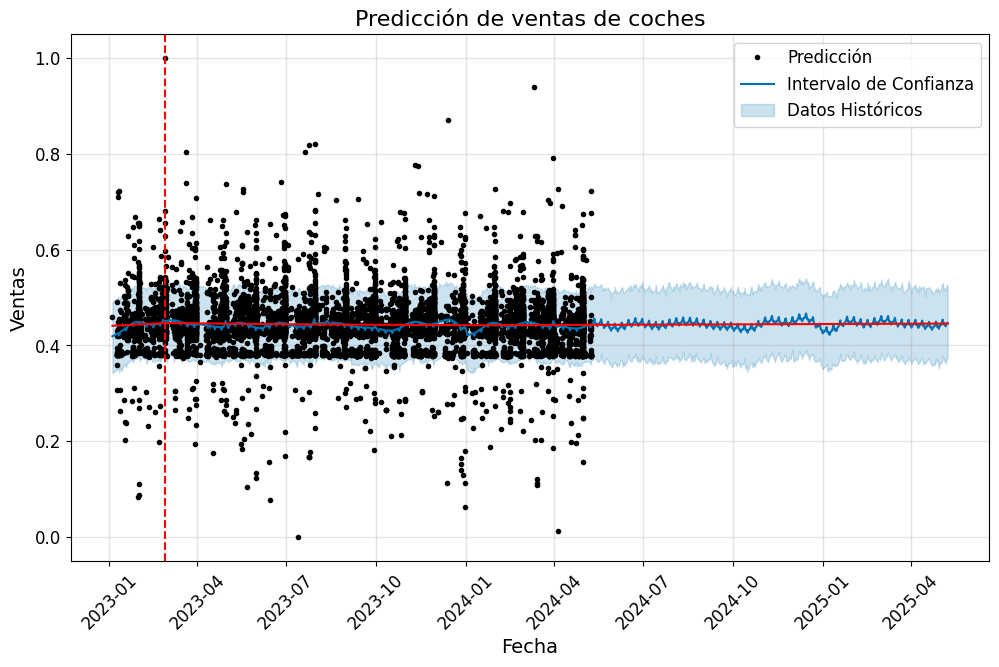

In [39]:
# Visualizar las predicciones
fig = model.plot(forecast, figsize = (10, 6))

a = add_changepoints_to_plot(fig.gca(), model, forecast)

ax = fig.gca()
ax.set_title('Predicción de ventas de coches', fontsize = 16)
ax.set_xlabel('Fecha', fontsize = 14)
ax.set_ylabel('Ventas', fontsize = 14)
ax.tick_params(axis = 'x', labelrotation = 45)
ax.tick_params(axis = 'both', labelsize = 12)

# Leyenda
ax.legend(['Predicción', 'Intervalo de Confianza', 'Datos Históricos'], fontsize = 12)

plt.show()

## Predicción de Ventas de Coches

El gráfico muestra la predicción de ventas de coches basada en el modelo Prophet, desglosando las ventas reales en comparación con las predicciones futuras.

### Componentes del Gráfico

- **Puntos Negros**: Representan los datos históricos de ventas de coches. Cada punto es una observación de las ventas en un día específico.

- **Línea Azul**: Esta línea muestra la tendencia central de las predicciones del modelo. La línea sigue la tendencia deducida de los datos históricos y proyecta esta tendencia hacia el futuro.

- **Área Azul Clara**: Denota el intervalo de confianza de las predicciones. Esta área sombreada muestra dónde el modelo predice que las ventas reales podrían variar, con una probabilidad del 80% (o cualquier otro porcentaje configurado) de que las ventas reales estén dentro de este rango.

- **Línea Roja Punteada**: Indica el punto en el tiempo donde el modelo comienza a hacer predicciones basadas en el análisis de los datos históricos. Las fechas a la izquierda son datos históricos, mientras que a la derecha están las proyecciones futuras.

### Escala del Eje Y

La escala del eje y está normalizada entre 0 y 1. Esto se hace típicamente para facilitar la comparación entre diferentes series de tiempo o para cumplir con los requisitos del modelo estadístico. En este caso, la normalización permite una interpretación clara de la tendencia y la estacionalidad sin ser distorsionada por valores absolutos que podrían variar significativamente entre diferentes periodos o contextos de venta. Esta escala es especialmente útil en el análisis predictivo donde la consistencia de la escala ayuda a identificar patrones más claramente.

### Interpretación

El modelo sugiere una tendencia generalmente estable en las ventas de coches con fluctuaciones menores a lo largo del tiempo. La predicción indica que esta tendencia se mantendrá en el futuro cercano, aunque con variaciones que reflejan la estacionalidad y otros factores influyentes detectados por el modelo.

### Uso Estratégico

Estas predicciones son vitales para la planificación estratégica en marketing y operaciones. Por ejemplo, el equipo de marketing puede usar esta información para planear campañas dirigidas durante períodos de alta demanda proyectada. Igualmente, la gestión de inventario puede ser optimizada para asegurar que la oferta coincida con la demanda esperada, maximizando así la eficiencia y la rentabilidad.

### Conclusión

El análisis predictivo, como el mostrado en este gráfico, proporciona una herramienta esencial para anticipar cambios en el mercado y ajustar las estrategias empresariales de manera proactiva. Esta capacidad de anticipar el futuro basándose en datos pasados permite a la empresa mantenerse competitiva y alineada con las tendencias del mercado.

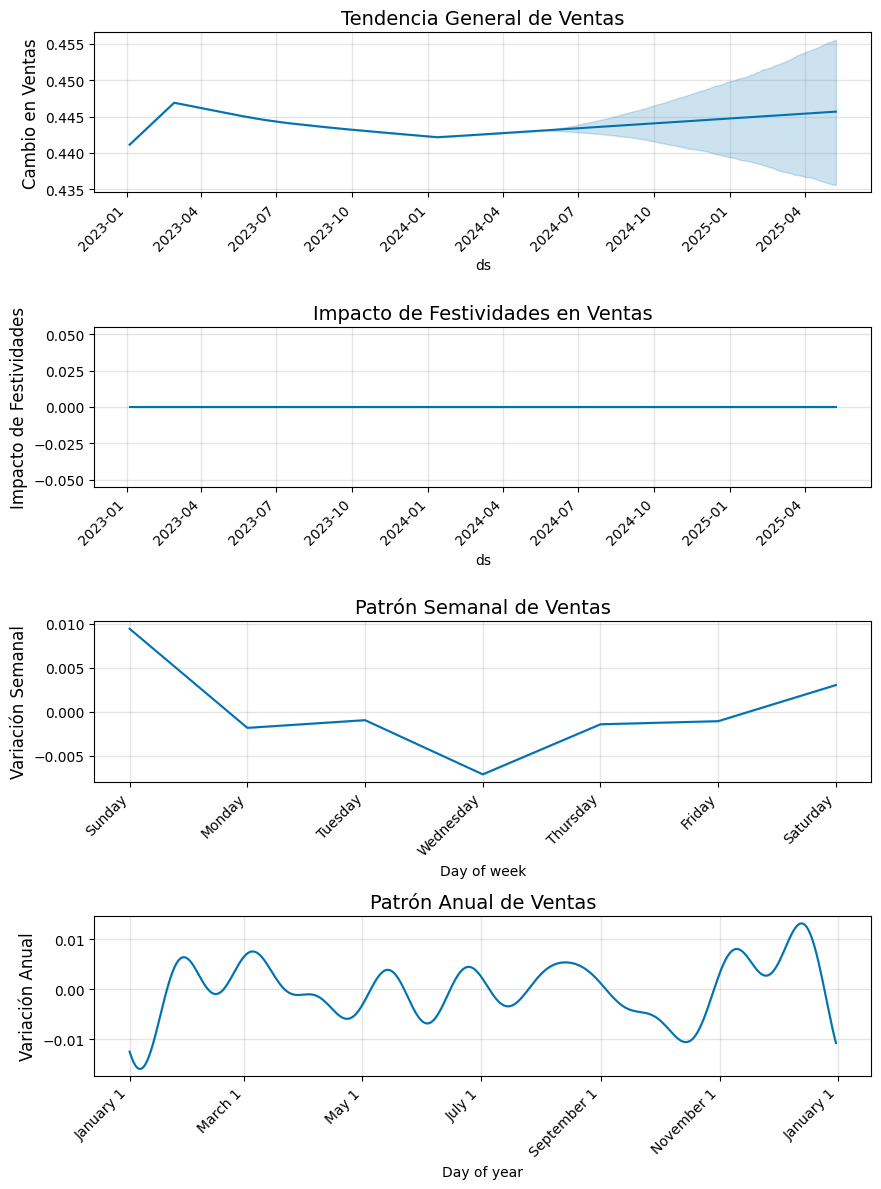

In [43]:
# Generar la figura con los componentes del modelo
fig2 = model.plot_components(forecast)
axes = fig2.get_axes()

# Cambiar las etiquetas del eje y para cada gráfico
axes[0].set_ylabel('Cambio en Ventas', fontsize=12)  # Tendencia
axes[1].set_ylabel('Impacto de Festividades', fontsize=12)  # Festividades
axes[2].set_ylabel('Variación Semanal', fontsize=12)  # Estacionalidad Semanal
axes[3].set_ylabel('Variación Anual', fontsize=12)  # Estacionalidad Anual

# Ajustar el título para cada gráfico
axes[0].set_title('Tendencia General de Ventas', fontsize=14)
axes[1].set_title('Impacto de Festividades en Ventas', fontsize=14)
axes[2].set_title('Patrón Semanal de Ventas', fontsize=14)
axes[3].set_title('Patrón Anual de Ventas', fontsize=14)

# Rotar las etiquetas del eje x donde sea necesario
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# Ajustar el espacio para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()


## Análisis Detallado de Componentes de las Ventas de Coches

A continuación, se presenta un desglose de los diferentes componentes que afectan las predicciones de ventas de coches, utilizando el modelo Prophet. Cada gráfico proporciona insights sobre distintos factores que influyen en las tendencias de ventas.

### Tendencia General de Ventas

- **Gráfico Superior**: Este gráfico muestra la tendencia subyacente en las ventas de coches a lo largo del tiempo. Podemos observar una tendencia generalmente constante con una ligera disminución a mediados del período observado. La sombra azul alrededor de la línea de tendencia muestra el intervalo de confianza, lo que indica dónde se espera que fluctúen las ventas con una cierta probabilidad.

### Impacto de Festividades en Ventas

- **Segundo Gráfico**: Representa el impacto estimado de las festividades en las ventas de coches. Este componente muestra cómo días específicos, como festivos nacionales o locales, pueden influir en las ventas. La línea horizontal indica la ausencia de un impacto significativo de festividades en la mayoría de los períodos, con excepciones en fechas particulares que requieren una investigación adicional para identificar eventos específicos.

### Patrón Semanal de Ventas

- **Tercer Gráfico**: Muestra cómo varían las ventas de coches a lo largo de la semana. Este análisis es crucial para optimizar la fuerza laboral y las campañas de marketing en días específicos de la semana que muestran mayores ventas, como se observa hacia el final de la semana.

### Patrón Anual de Ventas

- **Último Gráfico**: Ilustra la estacionalidad anual de las ventas de coches. Claramente visible, las ventas fluctúan significativamente a lo largo del año, lo cual es vital para la planificación de la producción y las actividades promocionales. Los picos y valles pueden corresponder a temporadas de compras altas y bajas, influenciadas por factores económicos, climáticos y sociales.

### Explicación de la Escala del Eje Y

En todos los gráficos, el eje y representa una medida normalizada o ajustada de las ventas, lo que permite una comparación más fácil entre diferentes periodos o componentes sin ser afectada por la magnitud absoluta de las ventas. Esta escala es particularmente útil para visualizar y comparar las variaciones relativas y tendencias dentro de los datos, independientemente del volumen total de ventas. Utilizar esta escala normalizada ayuda a identificar los patrones más claramente y a hacer inferencias más precisas sobre el comportamiento de las ventas a lo largo del tiempo.

### Conclusión

El entendimiento detallado de estos componentes ayuda a los equipos de marketing y ventas a desarrollar estrategias más informadas y eficaces. Al anticipar las tendencias y ajustarse a los patrones de compra observados, la empresa puede mejorar significativamente su alcance en el mercado y optimizar sus recursos de manera efectiva.
